# Scatter plots analysis

En el siguiente notebook, se busca generar scatter plots con los datos obtenidos mediantes la pruebas de medicion de TIX. Especificamente, se busca encontrar la relacion entre el uso medido por TIX con el uso real utilizado por la red, para poder corregir el error del uso medido por TIX.

In [1]:
# Setteamos el path a la carpeta donde se encuentrar los datos de las pruebas de las mediciones. 

FOLDER_DATA_PATH = '/home/victoriax/Desktop/data-mesuarments/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Definimos los nombres de los archivos y generamos los DataFrames con los datos.

file_name = '2024-07-11.xlsx' 
path_to_file = FOLDER_DATA_PATH + file_name

df1 = pd.read_excel(
     path_to_file,
     engine='openpyxl',
)
#df1.head(15)

In [4]:
file_name = '2024-06-27.xlsx' 
path_to_file = FOLDER_DATA_PATH + file_name

df2 = pd.read_excel(
     path_to_file,
     engine='openpyxl',
)

In [5]:
file_name = '2024-06-26.xlsx' 
path_to_file = FOLDER_DATA_PATH + file_name

df3 = pd.read_excel(
     path_to_file,
     engine='openpyxl',
)

In [6]:
file_name = '2024-07-16.xlsx' 
path_to_file = FOLDER_DATA_PATH + file_name

df4 = pd.read_excel(
     path_to_file,
     engine='openpyxl',
)

In [7]:
file_name = '2024-07-17.xlsx' 
path_to_file = FOLDER_DATA_PATH + file_name

df5 = pd.read_excel(
     path_to_file,
     engine='openpyxl',
)

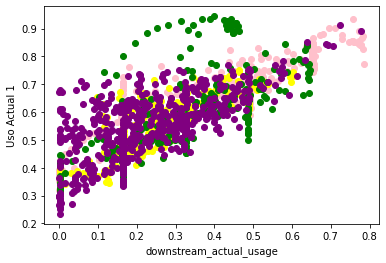

In [8]:
# Definimos los datos que vamos a usar para generar los scatter plots.
# La columna "downstream_actual_usage" tiene los datos del uso real de la red.
# La columna "Uso Actual 1" tiene los datos del uso calculados por TIX.

x1 = df1["downstream_actual_usage"].values.tolist()[9:]
y1 = df1["Uso Actual 1"].values.tolist()[9:]

x2 = df2["downstream_actual_usage"].values.tolist()[9:]
y2 = df2["Uso Actual 1"].values.tolist()[9:]

x3 = df3["downstream_actual_usage"].values.tolist()[9:]
y3 = df3["Uso Actual 1"].values.tolist()[9:]

x4 = df4["downstream_actual_usage"].values.tolist()[9:]
y4 = df4["Uso Actual 1"].values.tolist()[9:]

x5 = df5["downstream_actual_usage"].values.tolist()[9:]
y5 = df5["Uso Actual 1"].values.tolist()[9:]
 
plt.scatter(x1, y1, c ="pink")
 
plt.scatter(x2, y2, c ="yellow")

plt.scatter(x3, y3, c ="green")

plt.scatter(x4, y4, c ="purple")

plt.scatter(x5, y5, c ="purple")

 
plt.xlabel("downstream_actual_usage")
plt.ylabel("Uso Actual 1")
plt.show()

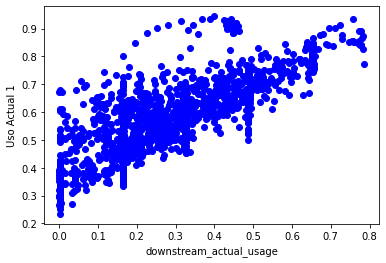

In [9]:
x_total = x1 + x2 + x3 + x4 + x5
y_total = y1 + y2 + y3 + y4 + y5
plt.scatter(x_total, y_total, c ="blue")
plt.xlabel("downstream_actual_usage")
plt.ylabel("Uso Actual 1")
plt.show()

In [10]:
# Utilizando una aproximacion por cuadrados minimos, utilizamos todos los datos para generar 
# la recta que ajusta mejor.

f = np.polynomial.polynomial.polyfit(x_total, y_total, 1)
f

#https://interactivechaos.com/es/manual/tutorial-de-numpy/minimos-cuadrados

array([0.41670285, 0.58263425])

/home/victoriax/Desktop/Tix-Time-Processor-Agus-Refactor/tix-time-processor/tix-processor-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


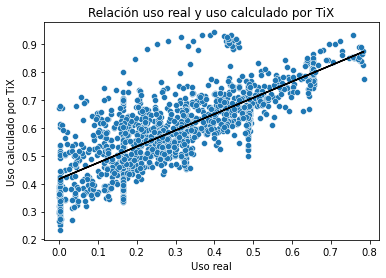

In [17]:
# Graficamos la recta que mejor ajusta generada en la celda anterior.

yf = [np.polynomial.polynomial.polyval(cx, f) for cx in x_total]
fig, ax = plt.subplots()
sns.scatterplot(x_total, y_total, ax = ax);
ax.set(xlabel='Uso real', ylabel='Uso calculado por TiX')
plt.title("Relación uso real y uso calculado por TiX")
ax.plot(x_total, yf, linestyle = "-", color = 'black');

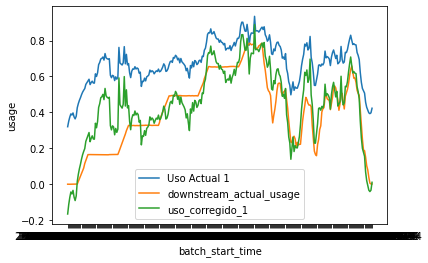

In [12]:
# Realizando la inversa de la funcion calculada anteriormente, ajustamos los valores calulado por TIX.
# Estos valores corregidos seran graficados junto con el Uso Actual 1 y el downstream_actual_usage.

uso_corregido_1 = [(value - f[0])/f[1] for value in df1["Uso Actual 1"].values.tolist()[9:]]

plt.plot(df1["batch_start_time"].values.tolist()[9:],df1["Uso Actual 1"].values.tolist()[9:],df1["batch_start_time"].values.tolist()[9:],df1["downstream_actual_usage"].values.tolist()[9:],df1["batch_start_time"].values.tolist()[9:],uso_corregido_1,  '-')
plt.legend(('Uso Actual 1', 'downstream_actual_usage', 'uso_corregido_1'))
plt.xlabel("batch_start_time")
plt.ylabel("usage")
plt.show()

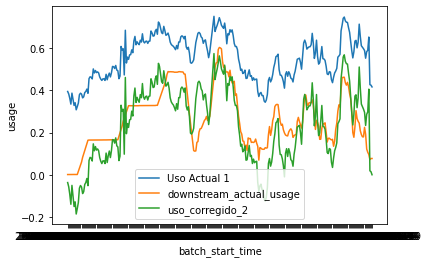

In [13]:
uso_corregido_2 = [(value - f[0])/f[1] for value in df2["Uso Actual 1"].values.tolist()[9:]]

plt.plot(df2["batch_start_time"].values.tolist()[9:],df2["Uso Actual 1"].values.tolist()[9:],df2["batch_start_time"].values.tolist()[9:],df2["downstream_actual_usage"].values.tolist()[9:],df2["batch_start_time"].values.tolist()[9:],uso_corregido_2,  '-')
plt.legend(('Uso Actual 1', 'downstream_actual_usage', 'uso_corregido_2'))
plt.xlabel("batch_start_time")
plt.ylabel("usage")
plt.show()

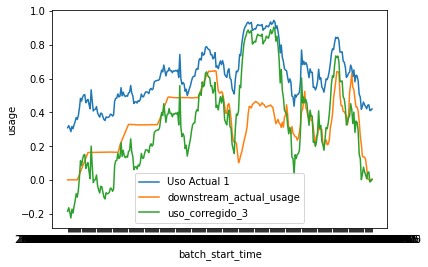

In [14]:
uso_corregido_3 = [(value - f[0])/f[1] for value in df3["Uso Actual 1"].values.tolist()[9:]]

plt.plot(df3["batch_start_time"].values.tolist()[9:],df3["Uso Actual 1"].values.tolist()[9:],df3["batch_start_time"].values.tolist()[9:],df3["downstream_actual_usage"].values.tolist()[9:],df3["batch_start_time"].values.tolist()[9:],uso_corregido_3,  '-')
plt.legend(('Uso Actual 1', 'downstream_actual_usage', 'uso_corregido_3'))
plt.xlabel("batch_start_time")
plt.ylabel("usage")
plt.show()

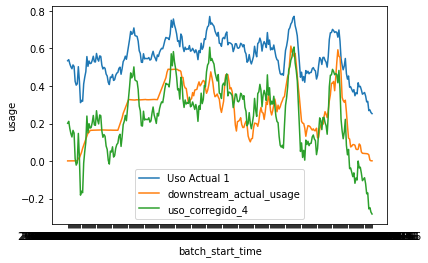

In [15]:
uso_corregido_4 = [(value - f[0])/f[1] for value in df4["Uso Actual 1"].values.tolist()[9:]]

plt.plot(df4["batch_start_time"].values.tolist()[9:],df4["Uso Actual 1"].values.tolist()[9:],df4["batch_start_time"].values.tolist()[9:],df4["downstream_actual_usage"].values.tolist()[9:],df4["batch_start_time"].values.tolist()[9:],uso_corregido_4,  '-')
plt.legend(('Uso Actual 1', 'downstream_actual_usage', 'uso_corregido_4'))
plt.xlabel("batch_start_time")
plt.ylabel("usage")
plt.show()

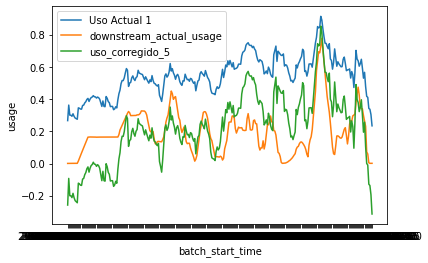

In [17]:
uso_corregido_5 = [(value - f[0])/f[1] for value in df5["Uso Actual 1"].values.tolist()[9:]]

plt.plot(df5["batch_start_time"].values.tolist()[9:],df5["Uso Actual 1"].values.tolist()[9:],df5["batch_start_time"].values.tolist()[9:],df5["downstream_actual_usage"].values.tolist()[9:],df5["batch_start_time"].values.tolist()[9:],uso_corregido_5,  '-')
plt.legend(('Uso Actual 1', 'downstream_actual_usage', 'uso_corregido_5'))
plt.xlabel("batch_start_time")
plt.ylabel("usage")
plt.show()